In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_excel("data.xlsx")

In [5]:
data.head()

,Merchant Id,Annual Revenue (k$),Spending Score (1-100),City,Most Purchased Product,Repayment Score 1-5
0,1,15,39,Mtwara,Mtindi 500ml,1
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2
2,3,16,6,Mtwara,Mtindi 500ml,3
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4
4,5,17,40,Mtwara,Mtindi 500ml,2


In [6]:
data.rename(columns={'Genre':'Gender',
                   'Annual Revenue (k$)':'Annual_Revenue',
                   'Spending Score (1-100)':'Spending_Score',
                   'Most Purchased Product': 'Most_Purchased_Product',
                    'Repayment Score 1-5': 'Repayment_Score'
                  },
                    inplace=True
           )

In [7]:
data.describe()

,Merchant Id,Annual_Revenue,Spending_Score,Repayment_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000,3.990000
std,57.879185,26.264721,25.823522,0.850598
min,1.000000,15.000000,1.000000,1.000000
25%,50.750000,41.500000,34.750000,4.000000
50%,100.500000,61.500000,50.000000,4.000000
75%,150.250000,78.000000,73.000000,5.000000
max,200.000000,137.000000,99.000000,5.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant Id             200 non-null    int64 
 1   Annual_Revenue          200 non-null    int64 
 2   Spending_Score          200 non-null    int64 
 3   City                    200 non-null    object
 4   Most_Purchased_Product  200 non-null    object
 5   Repayment_Score         200 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [9]:
data['City'].value_counts()

Dar es Salaam    82
Moshi            76
Mtwara           21
Zanzibar City    21
Name: City, dtype: int64

In [10]:
data['Most_Purchased_Product'].value_counts()

Mtindi 250ml        82
Fresh Milk 1ltr     76
Mtindi 500ml        21
Fresh Milk 250ml    21
Name: Most_Purchased_Product, dtype: int64

In [11]:
data.isna().sum()

Merchant Id               0
Annual_Revenue            0
Spending_Score            0
City                      0
Most_Purchased_Product    0
Repayment_Score           0
dtype: int64

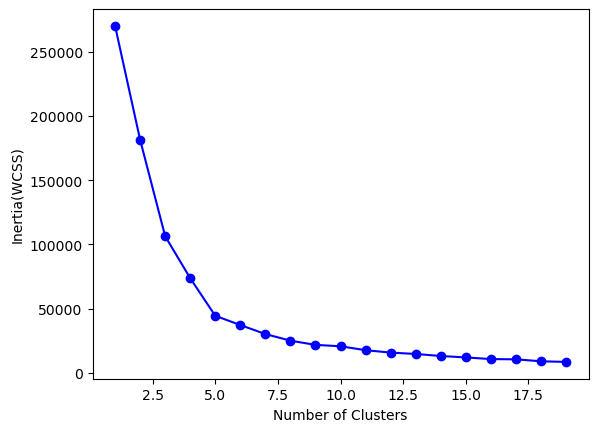

In [12]:
#Creating values for the elbow
X = data.loc[:,["Annual_Revenue", "Spending_Score"]]
inertia = []
r = range(1,20)
for i in r:
    means_r = KMeans(n_clusters=i, random_state=0)
    means_r.fit(X)
    inertia.append(means_r.inertia_)

#Plotting the elbow
plt.plot(r , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia(WCSS)')
plt.show()


In [13]:
rmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_rmeans = rmeans.fit_predict(X)
labels = means_r.labels_
centroids = rmeans.cluster_centers_


In [14]:
print(y_rmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [15]:
len(y_rmeans)

200

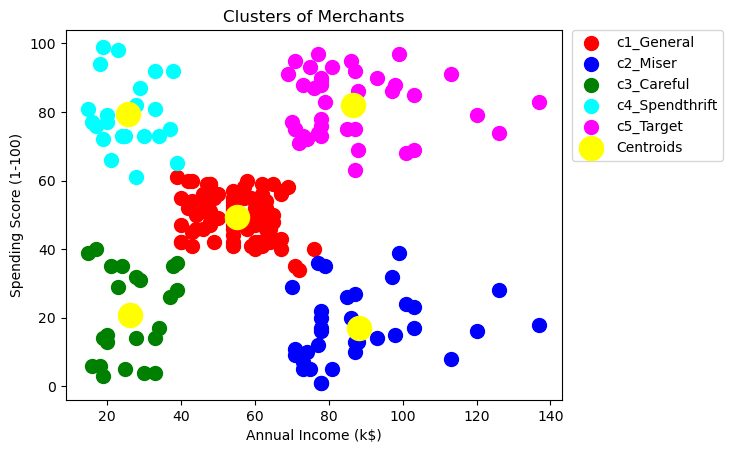

In [16]:
# Visualising the Clusters
# Visualising the clusters
plt.scatter(X[y_rmeans == 0]['Annual_Revenue'], X[y_rmeans == 0]['Spending_Score'], s = 100, c = 'red', label = 'c1_General')
plt.scatter(X[y_rmeans == 1]['Annual_Revenue'], X[y_rmeans == 1]['Spending_Score'], s = 100, c = 'blue', label = 'c2_Miser')
plt.scatter(X[y_rmeans == 2]['Annual_Revenue'], X[y_rmeans == 2]['Spending_Score'], s = 100, c = 'green', label = 'c3_Careful')
plt.scatter(X[y_rmeans == 3]['Annual_Revenue'], X[y_rmeans == 3]['Spending_Score'], s = 100, c = 'cyan', label = 'c4_Spendthrift')
plt.scatter(X[y_rmeans == 4]['Annual_Revenue'], X[y_rmeans == 4]['Spending_Score'], s = 100, c = 'magenta', label = 'c5_Target')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Merchants')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
# plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [17]:
data.loc[:,"Cluster_Number"] = y_rmeans

In [18]:
Cluster_Nature = []

for row in data['Cluster_Number']:
    if row == 0: 
        Cluster_Nature.append('General')
    elif row == 1: 
        Cluster_Nature.append('Miser') # Miser is the one who hoards wealth and spends a little money
    elif row == 2: Cluster_Nature.append('Careful')
    elif row == 3: Cluster_Nature.append('Spendthrift') # spendthrift is the one who spends money in an extravagant
    elif row == 4:  Cluster_Nature.append('Target')
    else: Cluster_Nature.append('Outlier')

data['Cluster_Nature'] = Cluster_Nature


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant Id             200 non-null    int64 
 1   Annual_Revenue          200 non-null    int64 
 2   Spending_Score          200 non-null    int64 
 3   City                    200 non-null    object
 4   Most_Purchased_Product  200 non-null    object
 5   Repayment_Score         200 non-null    int64 
 6   Cluster_Number          200 non-null    int32 
 7   Cluster_Nature          200 non-null    object
dtypes: int32(1), int64(4), object(3)
memory usage: 11.8+ KB


In [20]:
data.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment_Score,Cluster_Number,Cluster_Nature
0,1,15,39,Mtwara,Mtindi 500ml,1,2,Careful
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2,3,Spendthrift
2,3,16,6,Mtwara,Mtindi 500ml,3,2,Careful
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4,3,Spendthrift
4,5,17,40,Mtwara,Mtindi 500ml,2,2,Careful


In [21]:
data['Cluster_Nature'].value_counts()

General        81
Target         39
Miser          35
Careful        23
Spendthrift    22
Name: Cluster_Nature, dtype: int64

In [22]:
uniqueValues = data['Cluster_Nature'].unique()
print(uniqueValues)

['Careful' 'Spendthrift' 'General' 'Target' 'Miser']


In [23]:
target_data = data.loc[data['Cluster_Nature'] == 'Target']

In [24]:
target_data.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment_Score,Cluster_Number,Cluster_Nature
123,124,69,91,Dar es Salaam,Mtindi 250ml,4,4,Target
125,126,70,77,Dar es Salaam,Mtindi 250ml,4,4,Target
127,128,71,95,Dar es Salaam,Mtindi 250ml,4,4,Target
129,130,71,75,Dar es Salaam,Mtindi 250ml,3,4,Target
131,132,71,75,Dar es Salaam,Mtindi 250ml,3,4,Target


<Axes: >

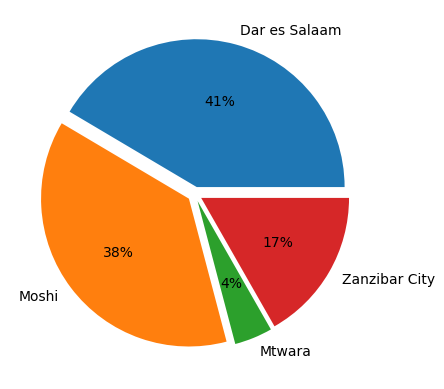

In [25]:
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05,0.05)
  
# Plotting the pie chart for above dataframe
data.groupby(['City']).sum().plot(
    kind='pie', y='Spending_Score', autopct='%1.0f%%', explode=explode, legend = False,ylabel='')

<Axes: >

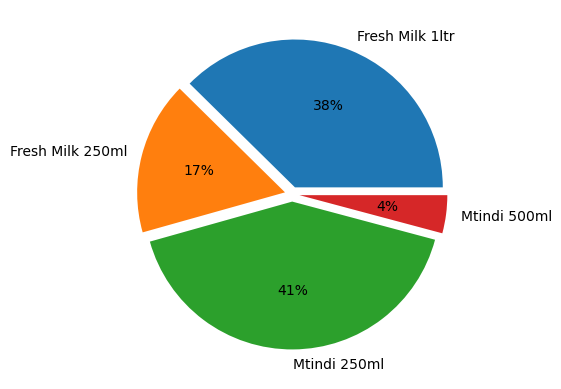

In [26]:
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05,0.05)
  
# Plotting the pie chart for above dataframe
data.groupby(['Most_Purchased_Product']).sum().plot(
    kind='pie', y='Spending_Score', autopct='%1.0f%%', explode=explode, legend = False, ylabel='')

Cluster_Nature  Careful  General  Miser  Spendthrift  Target
City                                                        
Dar es Salaam         0        8     35            0      39
Moshi                 2       73      0            1       0
Mtwara               21        0      0            0       0
Zanzibar City         0        0      0           21       0


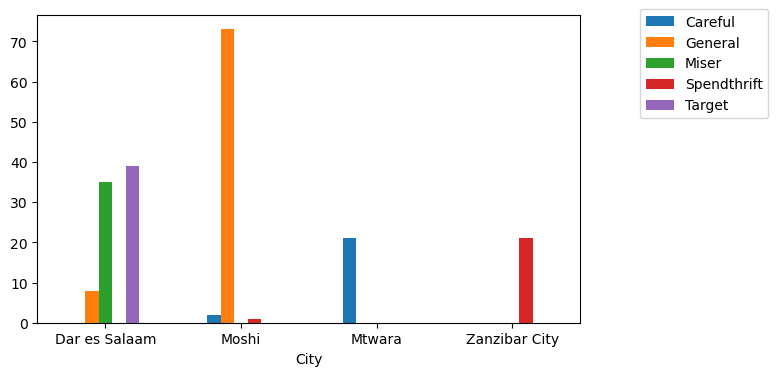

In [27]:

# Cross tabulation between City and Cluster  Nature
CrosstabResult=pd.crosstab(index=data['City'],columns=data['Cluster_Nature'])
print(CrosstabResult)
# Grouped bar chart 
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.legend(bbox_to_anchor=(1.36, 1.04))

Cluster_Nature          Careful  General  Miser  Spendthrift  Target
Most_Purchased_Product                                              
Fresh Milk 1ltr               2       73      0            1       0
Fresh Milk 250ml              0        0      0           21       0
Mtindi 250ml                  0        8     35            0      39
Mtindi 500ml                 21        0      0            0       0


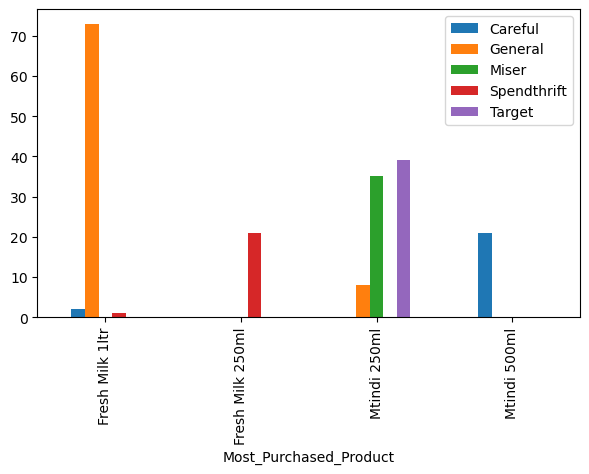

In [28]:
# Cross tabulation between Product and Cluster  Nature
CrosstabResult=pd.crosstab(index=data['Most_Purchased_Product'],columns=data['Cluster_Nature'])
print(CrosstabResult)
# Grouped bar chart 
CrosstabResult.plot.bar(figsize=(7,4))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

City                    Dar es Salaam  Moshi  Mtwara  Zanzibar City
Most_Purchased_Product                                             
Fresh Milk 1ltr                     0     76       0              0
Fresh Milk 250ml                    0      0       0             21
Mtindi 250ml                       82      0       0              0
Mtindi 500ml                        0      0      21              0


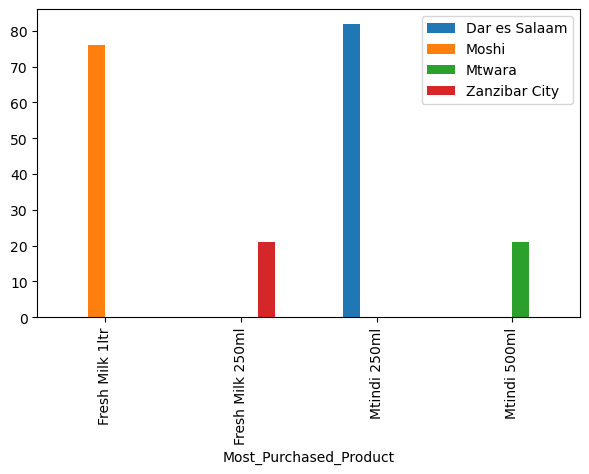

In [29]:
# Cross tabulation between Product and Cluster  Nature
CrosstabResult=pd.crosstab(index=data['Most_Purchased_Product'],columns=data['City'])
print(CrosstabResult)
# Grouped bar chart 
CrosstabResult.plot.bar(figsize=(7,4))
plt.legend(bbox_to_anchor=(1.0, 1.0))

                              Annual_Revenue
City          Cluster_Nature                
Dar es Salaam General                    556
              Miser                     3087
              Target                    3375
Moshi         Careful                     78
              General                   3923
              Spendthrift                 39
Mtwara        Careful                    527
Zanzibar City Spendthrift                527


<Axes: xlabel='City,Cluster_Nature'>

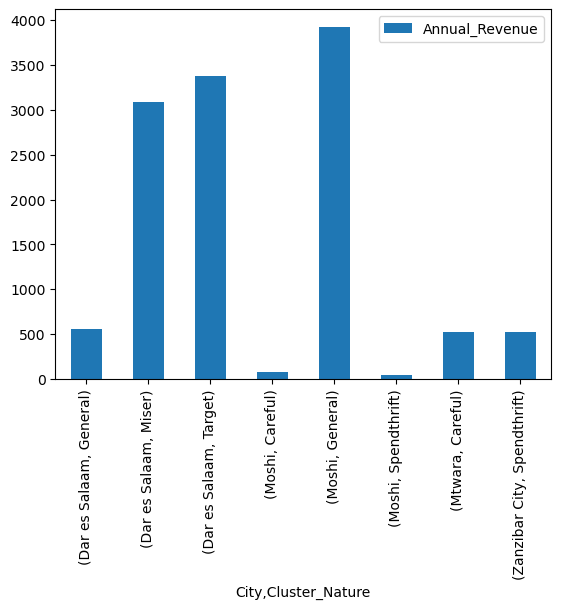

In [30]:
#Pivoit Table on city vs Cluster Nature aggregated by Annual Revenue
table = pd.pivot_table(data,index=['City','Cluster_Nature'],aggfunc={'Annual_Revenue':np.sum}) #,'Most_Purchased_Product':np.sum
print(table)
table.plot(kind='bar')

In [31]:
data.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment_Score,Cluster_Number,Cluster_Nature
0,1,15,39,Mtwara,Mtindi 500ml,1,2,Careful
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2,3,Spendthrift
2,3,16,6,Mtwara,Mtindi 500ml,3,2,Careful
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4,3,Spendthrift
4,5,17,40,Mtwara,Mtindi 500ml,2,2,Careful


In [32]:
# data.to_csv('final_analyzed_data.csv',index=False)